In [1]:
import base64
import datetime
import time
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels as sm
from pylab import rcParams
from numpy import median
import matplotlib.dates as mdates
np.random.seed(1337)
%matplotlib inline
rcParams['figure.figsize'] = 12, 8
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

In [2]:
tips = sns.load_dataset("tips")
tips["big_tip"] = (tips.tip / tips.total_bill) > .175
iris = sns.load_dataset("iris")
x = np.random.randn(200)
ans = sns.load_dataset("anscombe")
exercise = sns.load_dataset("exercise")
titanic = sns.load_dataset("titanic")
flights = sns.load_dataset("flights").pivot("month", "year", "passengers")
gammas = sns.load_dataset("gammas")

# barplot

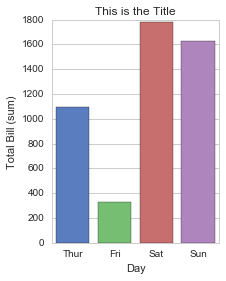

In [3]:
plt.figure(figsize=(3,4))
ax = sns.barplot(
        x='day',
        y='total_bill',
        data=tips,
        ci=None,
        estimator=sum)
_ = ax.set_xlabel('Day')
_ = ax.set_ylabel('Total Bill (sum)')
_ = ax.set_title('This is the Title')

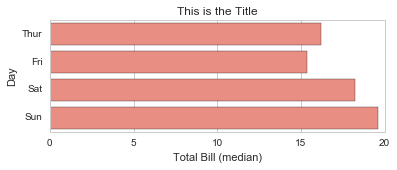

In [4]:
plt.figure(figsize=(6,2))
ax = sns.barplot(
        x='total_bill',
        y='day',
        data=tips,
        ci=None,
        estimator=median,
        color='salmon')
_ = ax.set_ylabel('Day')
_ = ax.set_xlabel('Total Bill (median)')
_ = ax.set_title('This is the Title')

# countplot

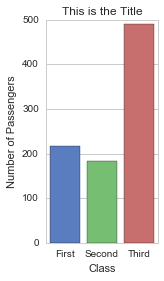

In [5]:
plt.figure(figsize=(2,4))
ax = sns.countplot(
        x='class',
        data=titanic)
_ = ax.set_xlabel('Class')
_ = ax.set_ylabel('Number of Passengers')
_ = ax.set_title('This is the Title')

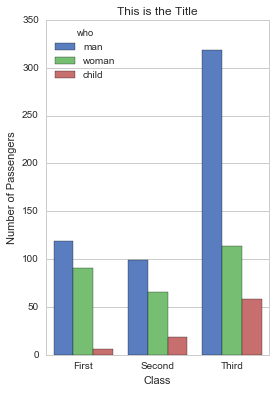

In [6]:
plt.figure(figsize=(4,6))
ax = sns.countplot(
        x='class',
        data=titanic,
        hue='who')
_ = ax.set_xlabel('Class')
_ = ax.set_ylabel('Number of Passengers')
_ = ax.set_title('This is the Title')

# distplot

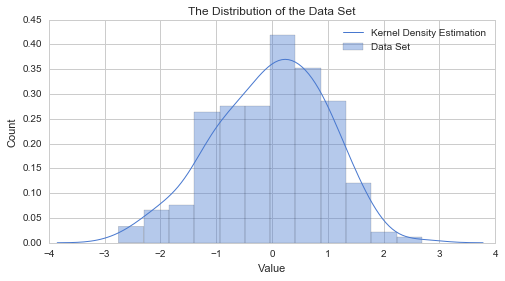

In [7]:
plt.figure(figsize=(8, 4))
ax = sns.distplot(
        a=x,
        label='Data Set',
        kde_kws={
            'linewidth': 1,
            'label': 'Kernel Density Estimation'})
_ = ax.legend()
_ = ax.set_xlabel('Value')
_ = ax.set_ylabel('Count')
_ = ax.set_title('The Distribution of the Data Set')

# boxplot

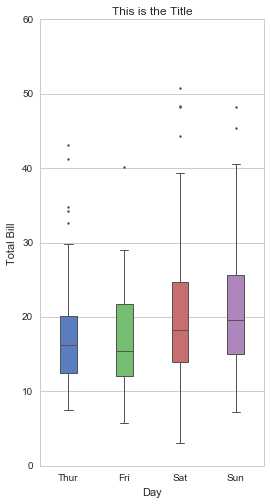

In [8]:
plt.figure(figsize=(4,8))
ax = sns.boxplot(
        x='day',
        y='total_bill',
        data=tips,
        width=0.3,
        linewidth=1,
        fliersize=5,
        flierprops={
            'marker': '.'})
_ = ax.set_xlabel('Day')
_ = ax.set_ylabel('Total Bill')
_ = ax.set_title('This is the Title')

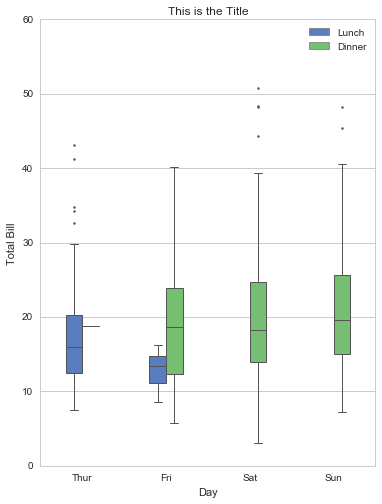

In [9]:
plt.figure(figsize=(6,8))
ax = sns.boxplot(
        x='day',
        y='total_bill',
        data=tips,
        hue='time',
        width=0.4,
        linewidth=1,
        fliersize=5,
        flierprops={
            'marker': '.'})
_ = ax.set_xlabel('Day')
_ = ax.set_ylabel('Total Bill')
_ = ax.set_title('This is the Title')
_ = ax.legend()

# factorplot

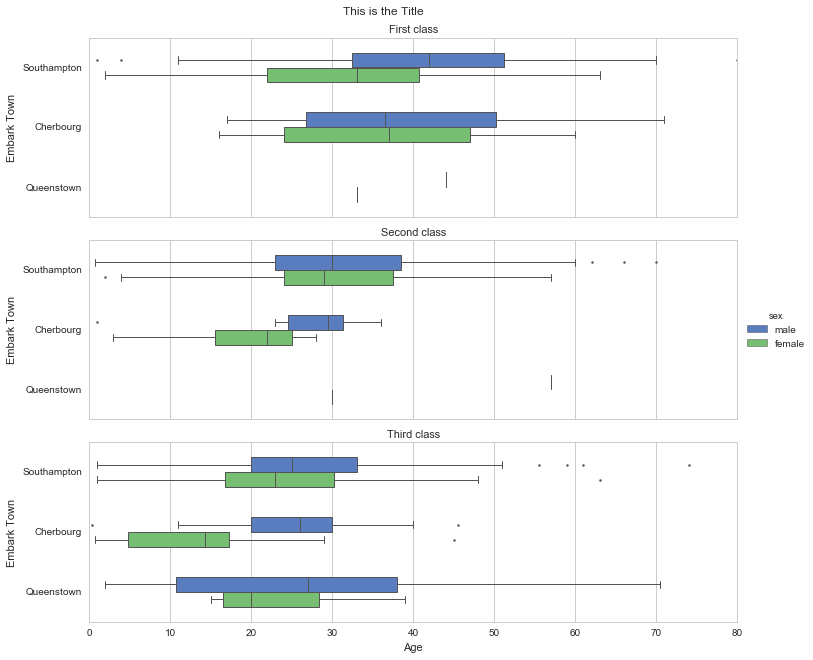

In [10]:
g = sns.factorplot(
        x='age',
        y='embark_town',
        hue='sex',
        row='class',
        data=titanic[titanic.embark_town.notnull()],
        orient='h',
        size=3,
        aspect=3.5,
        kind='box',
        linewidth=1,
        fliersize=5,
        flierprops={
            'marker': '.'},
        width=0.5)
_ = (g.set_axis_labels('Age', 'Embark Town')
         .set_titles('{row_name} {row_var}'))
_ = g.fig.text(0.43, 1, 'This is the Title', fontsize=12)
sns.despine(bottom=False, top=False, left=False, right=False)

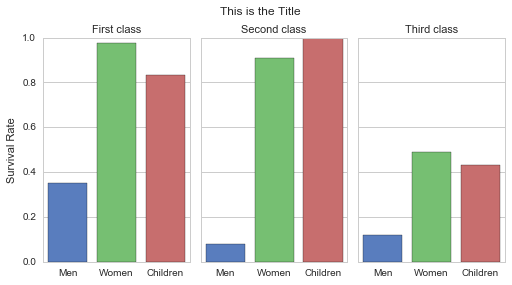

In [11]:
g = sns.factorplot(
        x='who',
        y='survived',
        col='class',
        data=titanic,
        kind='bar',
        ci=None,
        aspect=.6)
_ = (g.set_axis_labels('', 'Survival Rate')
     .set_xticklabels(['Men', 'Women', 'Children'])
     .set_titles('{col_name} {col_var}')
     .set(ylim=(0, 1)))
_ = g.fig.text(0.43, 1, 'This is the Title', fontsize=12)
sns.despine(bottom=False, top=False, left=False, right=False)

# lmplot

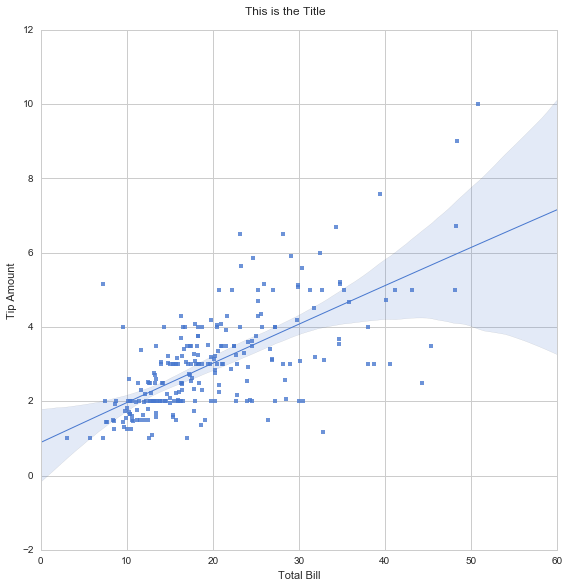

In [12]:
g = sns.lmplot(
        x='total_bill',
        y='tip',
        data=tips,
        order=2,
        size=8,
        markers=',',
        line_kws={
            'linewidth': 1})
_ = g.set_axis_labels('Total Bill', 'Tip Amount')
_ = g.fig.text(0.43, 1, 'This is the Title', fontsize=12)
sns.despine(bottom=False, top=False, left=False, right=False)

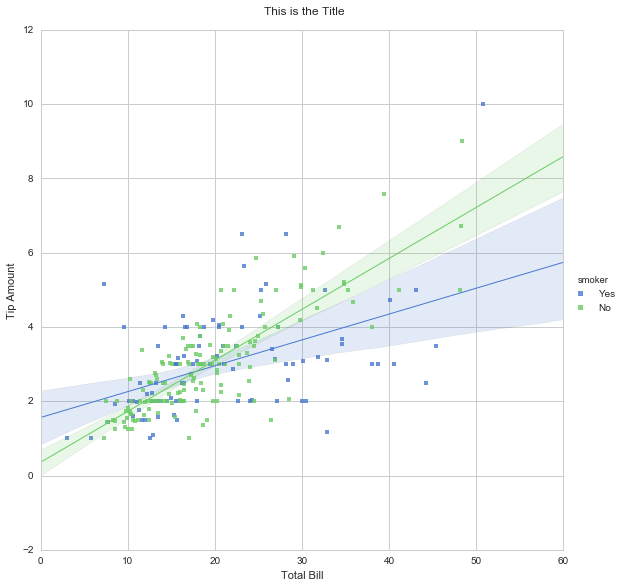

In [13]:
g = sns.lmplot(
        x='total_bill',
        y='tip',
        data=tips,
        order=1,
        hue='smoker',
        size=8,
        markers=',',
        line_kws={
            'linewidth': 1})
_ = g.set_axis_labels('Total Bill', 'Tip Amount')
_ = g.fig.text(0.43, 1, 'This is the Title', fontsize=12)
sns.despine(bottom=False, top=False, left=False, right=False)

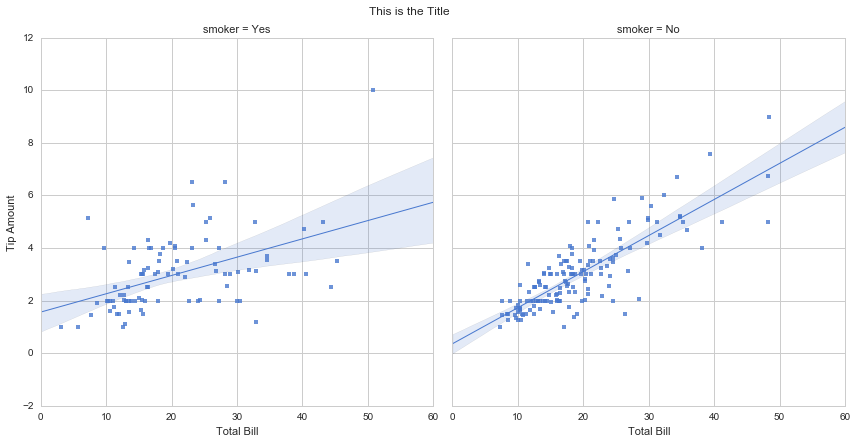

In [14]:
g = sns.lmplot(
        x='total_bill',
        y='tip',
        data=tips,
        order=1,
        col='smoker',
        size=6,
        markers=',',
        line_kws={
            'linewidth': 1})
_ = g.set_axis_labels('Total Bill', 'Tip Amount')
_ = g.fig.text(0.43, 1, 'This is the Title', fontsize=12)
sns.despine(bottom=False, top=False, left=False, right=False)

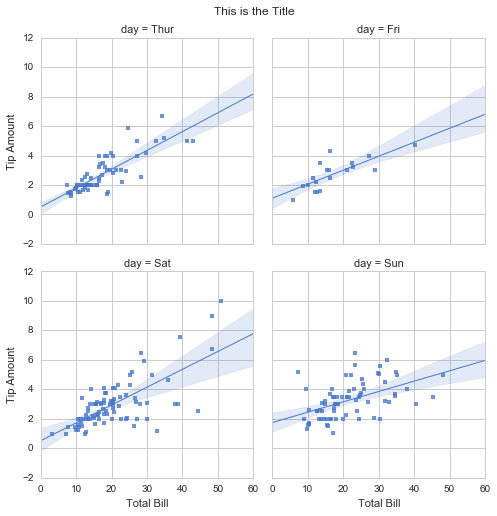

In [15]:
g = sns.lmplot(
        x='total_bill',
        y='tip',
        data=tips,
        order=1,
        markers=',',
        line_kws={
            'linewidth': 1},
        col='day',
        col_wrap=2,
        size=3.5)
_ = g.set_axis_labels('Total Bill', 'Tip Amount')
_ = g.fig.text(0.43, 1, 'This is the Title', fontsize=12)
sns.despine(bottom=False, top=False, left=False, right=False)

# residplot

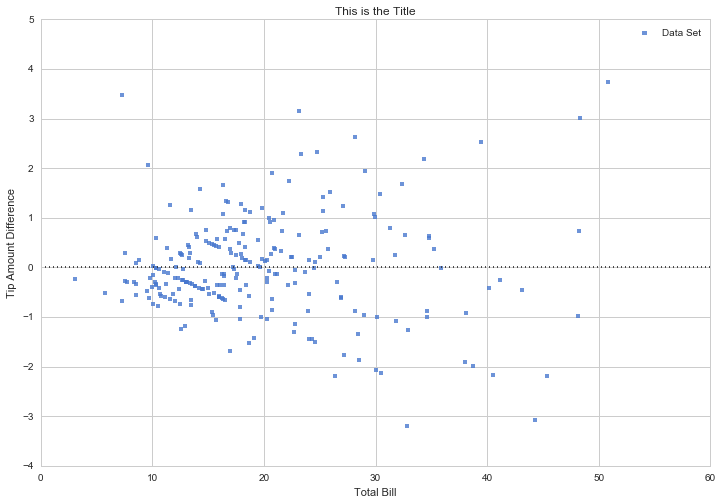

In [16]:
ax = sns.residplot(
        x='total_bill',
        y='tip',
        data=tips,
        order=1,
        label='Data Set',
        scatter_kws={
            'marker': ','})
_ = ax.set_xlabel('Total Bill')
_ = ax.set_ylabel('Tip Amount Difference')
_ = ax.set_title('This is the Title')
_ = ax.legend()

# regplot

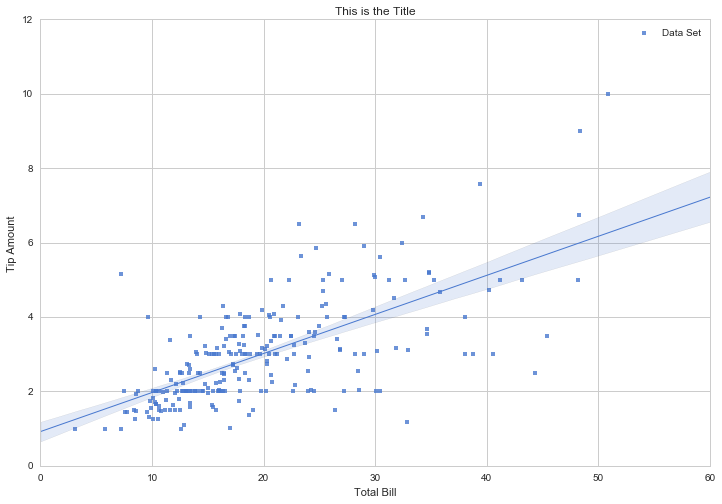

In [17]:
ax = sns.regplot(
        x='total_bill',
        y='tip',
        data=tips,
        order=1,
        label='Data Set',
        ci=80,
        marker=',',
        line_kws={
            'linewidth': 1})
_ = ax.set_xlabel('Total Bill')
_ = ax.set_ylabel('Tip Amount')
_ = ax.set_title('This is the Title')
_ = ax.legend()

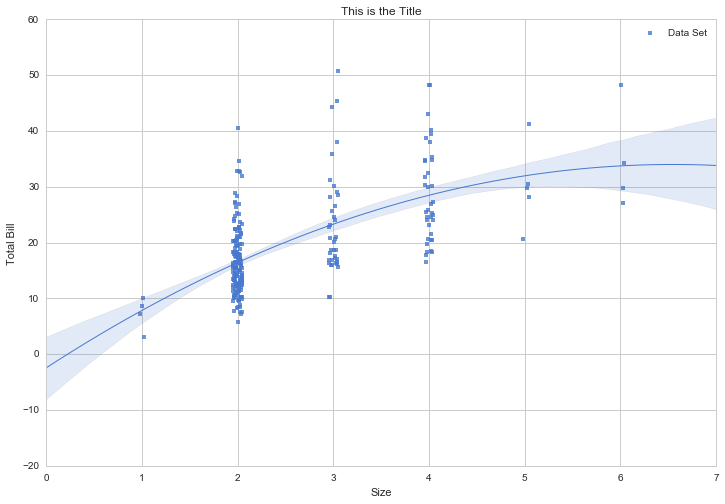

In [18]:
ax = sns.regplot(
        x='size',
        y="total_bill",
        data=tips,
        order=2,
        ci=80,
        marker=',',
        line_kws={
            'linewidth': 1},
        label='Data Set',
        x_jitter=.05)
_ = ax.set_xlabel('Size')
_ = ax.set_ylabel('Total Bill')
_ = ax.set_title('This is the Title')
_ = ax.legend()

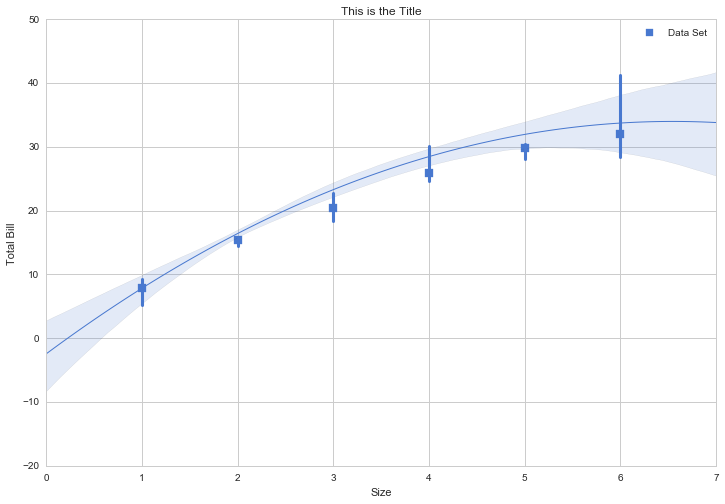

In [19]:
ax = sns.regplot(
        x='size',
        y="total_bill",
        data=tips,
        order=2,
        x_estimator=np.median,
        ci=80,
        marker=',',
        line_kws={
            'linewidth': 1},
        label='Data Set')
_ = ax.set_xlabel('Size')
_ = ax.set_ylabel('Total Bill')
_ = ax.set_title('This is the Title')
_ = ax.legend()

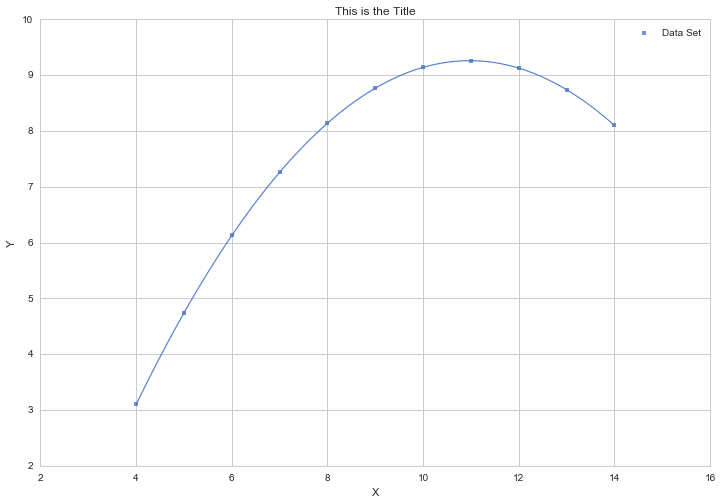

In [20]:
ax = sns.regplot(
        x='x',
        y='y',
        data=ans.loc[ans.dataset == 'II'],
        order=2,
        ci=80,
        marker=',',
        line_kws={
            'linewidth': 1},
        label='Data Set',
        truncate=True)
_ = ax.set_xlabel('X')
_ = ax.set_ylabel('Y')
_ = ax.set_title('This is the Title')
_ = ax.legend()

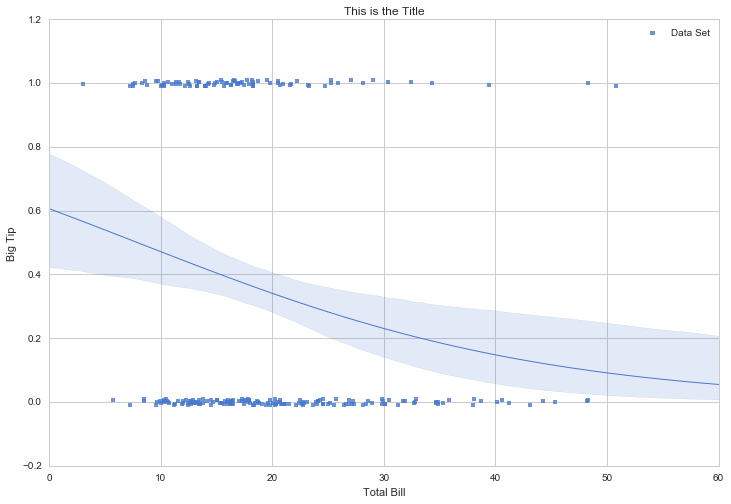

In [21]:
ax = sns.regplot(
        x='total_bill',
        y='big_tip',
        data=tips,
        logistic=True,
        marker=',',
        line_kws={
            'linewidth': 1},
        label='Data Set',
        y_jitter=.01)
_ = ax.set_xlabel('Total Bill')
_ = ax.set_ylabel('Big Tip')
_ = ax.set_title('This is the Title')
_ = ax.legend()

# heatmap

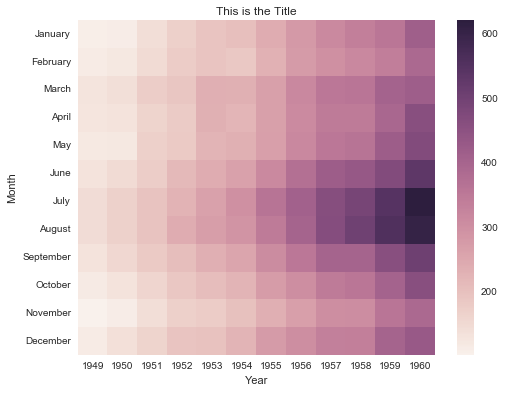

In [22]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(
        data=flights)
_ = ax.set_xlabel('Year')
_ = ax.set_ylabel('Month')
_ = ax.set_title('This is the Title')

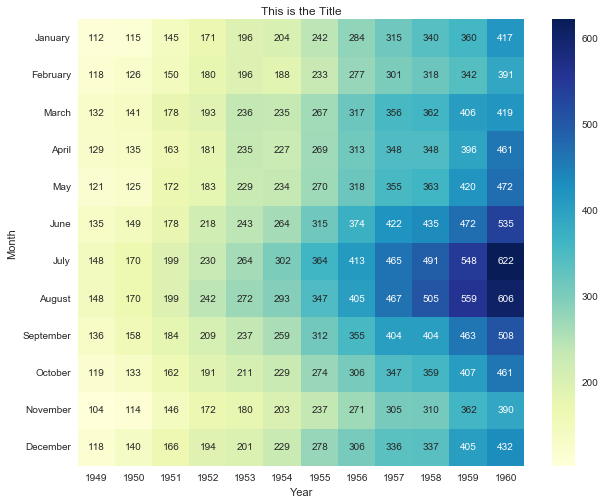

In [23]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(
        data=flights,
        annot=True,
        fmt='d',
        square=True,
        cmap='YlGnBu')
_ = ax.set_xlabel('Year')
_ = ax.set_ylabel('Month')
_ = ax.set_title('This is the Title')

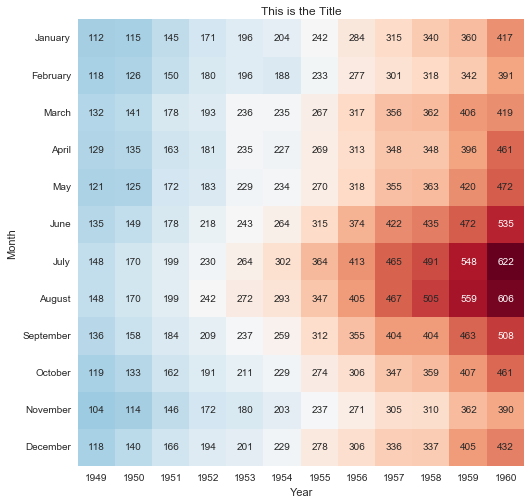

In [24]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(
        data=flights,
        annot=True,
        fmt='d',
        cbar=False,
        center=flights.loc['January', 1955],
        square=True)
_ = ax.set_xlabel('Year')
_ = ax.set_ylabel('Month')
_ = ax.set_title('This is the Title')

# tsplot

In [25]:
ndays = 100
rs = np.random.randn(ndays).cumsum()
dates = [datetime.datetime.today() - datetime.timedelta(days=i) for i in range(ndays)]
ts = pd.DataFrame({
        'date': dates,
        'value': rs})
_ = ts.set_index(ts.date)

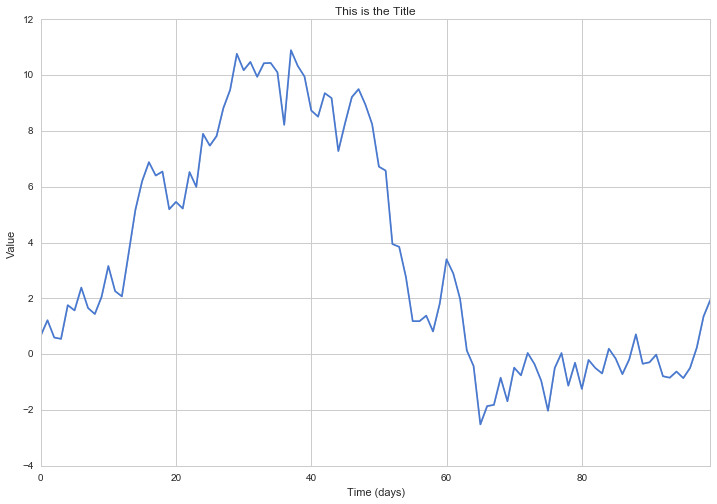

In [26]:
ax = sns.tsplot(
        data=[ts.value])
_ = ax.set_xlabel('Time (days)')
_ = ax.set_ylabel('Value')
_ = ax.set_title('This is the Title')